In [1]:
import pandas as pd
z = pd.read_csv(r'C:\Users\rivigo\Desktop\Quarantine & chill\final data.csv',header= 0,encoding= 'unicode_escape')
z.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 8:26,2.75,17850.0,United Kingdom


# Adding Year & Month column

In [41]:
z['year'] = pd.DatetimeIndex(z['InvoiceDate']).year
z.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,Revenue,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 8:26,2.55,17850.0,United Kingdom,12,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 8:26,3.39,17850.0,United Kingdom,12,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 8:26,2.75,17850.0,United Kingdom,12,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-10 8:26,3.39,17850.0,United Kingdom,12,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-10 8:26,3.39,17850.0,United Kingdom,12,20.34,2010


In [2]:
z['month'] = pd.DatetimeIndex(z['InvoiceDate']).month
z.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 8:26,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 8:26,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 8:26,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-10 8:26,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-10 8:26,3.39,17850.0,United Kingdom,12


## Cleaning-up the data

In [3]:
z.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True)
z.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 8:26,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 8:26,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 8:26,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-10 8:26,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-10 8:26,3.39,17850.0,United Kingdom,12


## Add a revenue column

In [55]:
z['Revenue'] = z['Quantity'] * z['UnitPrice']
z.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,Revenue,Hour,Minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,8,26


### What was the best month for sales & how much was the revenue?

In [23]:
results = z.groupby('month').sum()['Revenue']
results

month
1      475074.380
2      436546.150
3      579964.610
4      426047.851
5      648251.080
6      608013.160
7      574238.481
8      616368.000
9      931440.372
10     974603.590
11    1132407.740
12     897110.400
Name: Revenue, dtype: float64

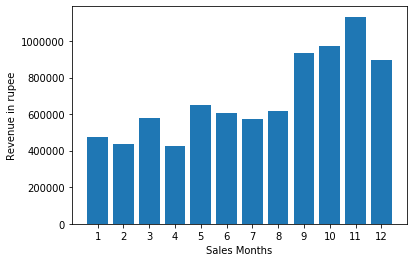

In [22]:
import matplotlib.pyplot as plt
month = range(1,13)
plt.bar(month,results['Revenue'])
plt.xticks(month)
plt.xlabel('Sales Months')
plt.ylabel('Revenue in rupee')
plt.show()
  

## Top 10 country in terms of revenue


In [16]:
results = z.sort_values('Revenue',ascending = True).groupby('Country').sum()
Top_country = results.nlargest(10,'Revenue')
Result = Top_country['Revenue']
Result

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: Revenue, dtype: float64

## Top 25 products with highest revenue for optimizing the storage space

In [27]:
results = z.sort_values('Revenue',ascending = True).groupby('StockCode').sum()
results
Top_Product = results.nlargest(25,'Revenue')
results = Top_Product['Revenue']
results


StockCode
22423     132870.40
85123A     93979.20
85099B     83236.76
47566      67687.53
POST       66710.24
84879      56499.22
23084      51137.80
22502      46980.95
79321      45936.81
22086      41500.48
21137      39009.38
22197      36859.88
23203      36607.98
22386      36473.01
23298      35691.14
23284      34312.60
82484      34307.06
22720      32607.80
22960      31658.47
85099F     30195.71
22470      28331.45
22178      28152.86
22469      28020.69
20725      27520.05
23245      26204.18
Name: Revenue, dtype: float64

### What is the best time to maximize likelihood of customer's buying product?

In [5]:
z['InvoiceDate'] = pd.to_datetime(z['InvoiceDate'])

In [8]:
z['Hour'] = z['InvoiceDate'].dt.hour
z['Minute'] = z['InvoiceDate'].dt.minute

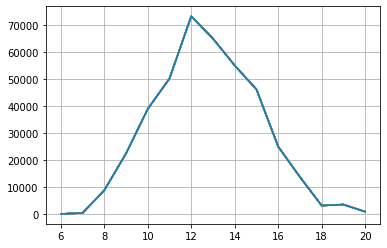

In [25]:
hours = [hour for hour ,df in z.groupby('Hour')]
plt.plot(hours,z.groupby(['Hour']).count())
plt.grid()
plt.show()

## What products are more often sold together?? 

In [34]:
df = z[z['InvoiceNo'].duplicated(keep=False)]
df['Grouped'] = df.groupby('InvoiceNo')['Description'].transform(lambda x: ','.join(x))
df = df[['InvoiceNo','Grouped']].drop_duplicates()
df.head()

C:\Users\rivigo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,Grouped
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
7,536366,"HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT"
9,536367,"ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUS..."
21,536368,"JAM MAKING SET WITH JARS,RED COAT RACK PARIS F..."
26,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."


In [47]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)


[(('KEY FOB ', 'KEY FOB '), 650),
 (('KEY FOB ', ' BACK DOOR '), 454),
 (('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 449),
 (('KEY FOB ', ' SHED'), 430),
 (('KEY FOB ', ' FRONT  DOOR '), 352),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT'), 330),
 (('ROSES REGENCY TEACUP AND SAUCER ', 'GREEN REGENCY TEACUP AND SAUCER'),
  323),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.'), 319),
 (('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 317),
 (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  311)]

## What products are sold most?

In [67]:
product_group = z.groupby('Description')
quantity_ordered = product_group.sum()['Quantity']
Descriptions = [Description for Description ,df in product_group]
plt.bar(Descriptions,quantity_ordered)
plt.xticks(Descriptions,rotation = 'vertical', size = 12)
plt.xlabel('Descriptions')
plt.ylabel('quantity_ordered')
plt.show()

SyntaxError: unexpected EOF while parsing (<ipython-input-67-5380d3cbfcb8>, line 8)